In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(filepath_or_buffer='data.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
print("Is this a classification or regression task and why? \n")
print("Answer: This would be considered a classification task as it involves predicting categorical variables. The objective is to classify individuals into one of two groups based on features and predictors.")

Is this a classification or regression task and why? 

Answer: This would be considered a classification task as it involves predicting categorical variables. The objective is to classify individuals into one of two groups based on features and predictors.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [5]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print("How many observations are there in total? \n")
total_observations = df.shape[0]
print("Total number of observations:", total_observations)

How many observations are there in total? 

Total number of observations: 303


In [8]:
print("Are there any missing values? \n")
missing_values = df.isnull().any()
print(missing_values)

Are there any missing values? 

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool


In [9]:
print("How many unique values are in each column? \n")
unique_values = df.nunique()
print("Unique values in each column:")
print(unique_values)

How many unique values are in each column? 

Unique values in each column:
age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [10]:
print("Which columns will you treat as categorical, which will you take as continuous, and why? \n")
print("Categorical columns: sex, cp, fbs, restecg, exng, slp, caa, thall, and output \n")
print("Continuous columns: age, trtbps, chol, thalachh, and oldpeak \n")
print("Reasoning -  Continuous columns represent numerical values that vary, while categorical are based on distinct categories or groups.")

Which columns will you treat as categorical, which will you take as continuous, and why? 

Categorical columns: sex, cp, fbs, restecg, exng, slp, caa, thall, and output 

Continuous columns: age, trtbps, chol, thalachh, and oldpeak 

Reasoning -  Continuous columns represent numerical values that vary, while categorical are based on distinct categories or groups.


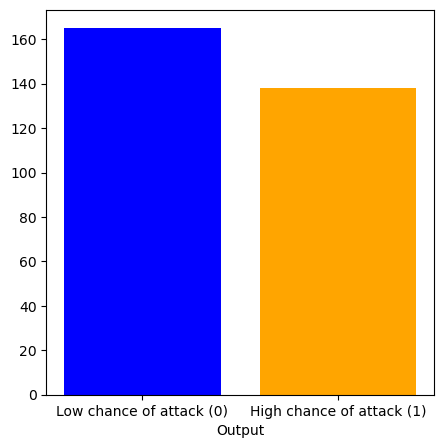

In [11]:
# Define the labels for the target variable
output_labels = ['Low chance of attack (0)', 'High chance of attack (1)']

# Plotting the target variable
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['output'].value_counts(), color=['blue', 'orange'])
plt.xlabel('Output')
plt.show()

In [12]:
print("Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not. \n")
count = df['output'].value_counts()
print(count)

print("\nThe difference between the counts of [0,1] - is not significant however the dataset is not perfectly balanced.")

Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not. 

output
1    165
0    138
Name: count, dtype: int64

The difference between the counts of [0,1] - is not significant however the dataset is not perfectly balanced.


In [13]:
print("Is working with a balanced dataset important? Why or why not? \n")
print("Working with a balanced dataset is important for model perofrmance and evaluation metrics. Imbalanced datasets can lead to biased models ignoring the minority data and tends to predict the majoirty more often.")

Is working with a balanced dataset important? Why or why not? 

Working with a balanced dataset is important for model perofrmance and evaluation metrics. Imbalanced datasets can lead to biased models ignoring the minority data and tends to predict the majoirty more often.


In [14]:
print("How can we deal with an imbalanced dataset? \n")
print("There are a couple ways of dealing with an imbalanced dataset, one you can reduce the number of instances of the majority (in this case [0]) are shown. Similarly you can increase the number of instances of the minority data (in this case [1]) that are shown. We could also use other evaluation metrics that work best with inbalanced datasets such as F1-score.")

How can we deal with an imbalanced dataset? 

There are a couple ways of dealing with an imbalanced dataset, one you can reduce the number of instances of the majority (in this case [0]) are shown. Similarly you can increase the number of instances of the minority data (in this case [1]) that are shown. We could also use other evaluation metrics that work best with inbalanced datasets such as F1-score.


In [15]:
scount =  df['sex'].value_counts()
print(scount)

sex
1    207
0     96
Name: count, dtype: int64


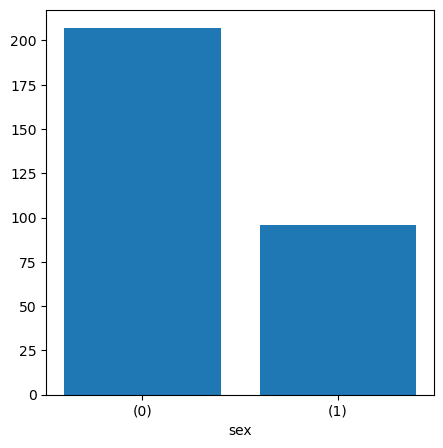

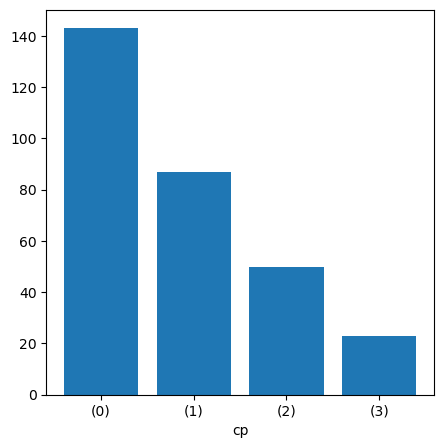

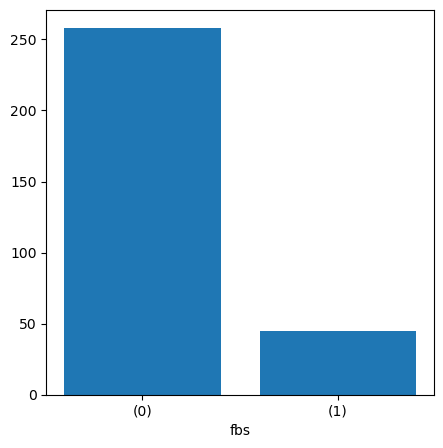

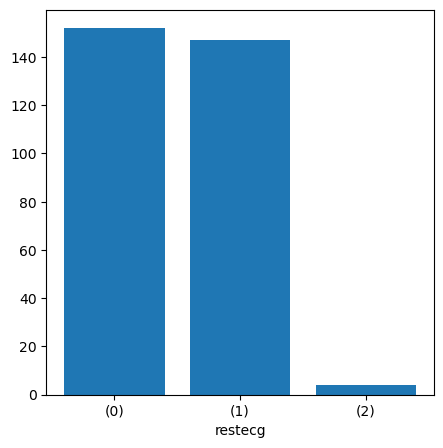

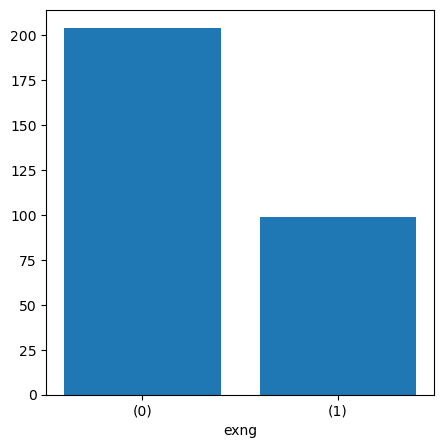

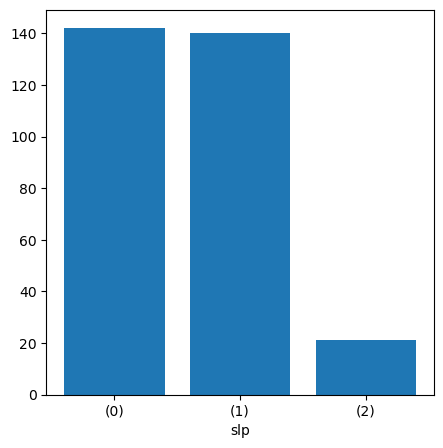

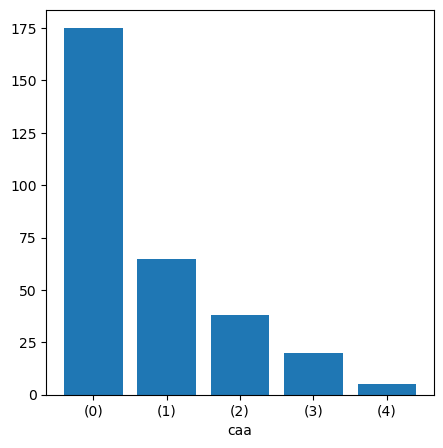

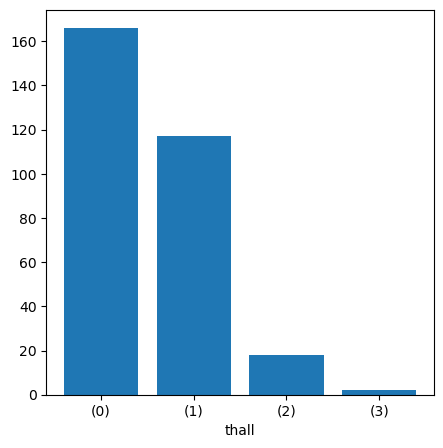

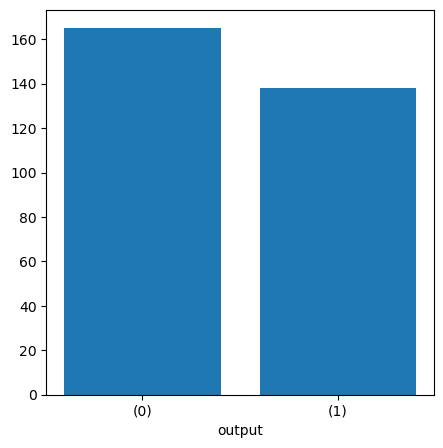

In [16]:
#1 Plotting sex
output_labels = ['(0)', '(1)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['sex'].value_counts())
plt.xlabel('sex')
plt.show()

#2 Plotting cp
output_labels = ['(0)', '(1)', '(2)', '(3)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['cp'].value_counts())
plt.xlabel('cp')
plt.show()

#3 Plotting fbs
output_labels = ['(0)', '(1)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['fbs'].value_counts())
plt.xlabel('fbs')
plt.show()

#4 Plotting restecg
output_labels = ['(0)', '(1)', '(2)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['restecg'].value_counts())
plt.xlabel('restecg')
plt.show()

#5 Plotting enxng
output_labels = ['(0)', '(1)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['exng'].value_counts())
plt.xlabel('exng')
plt.show()

#6 Plotting slp
output_labels = ['(0)', '(1)', '(2)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['slp'].value_counts())
plt.xlabel('slp')
plt.show()

#7 Plotting caa
output_labels = ['(0)', '(1)', '(2)', '(3)', '(4)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['caa'].value_counts())
plt.xlabel('caa')
plt.show()

#8 Plotting thall
output_labels = ['(0)', '(1)', '(2)', '(3)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['thall'].value_counts())
plt.xlabel('thall')
plt.show()

#9 Plotting output
output_labels = ['(0)', '(1)']
plt.figure(figsize=(5, 5))
plt.bar(output_labels, df['output'].value_counts())
plt.xlabel('output')
plt.show()

In [17]:
print("What can you conclude from the plots you created? Are there any interesting findings?\n")
print("Answer - We can conclude there are more sex(0) then there are sex(1). People expereincing chest pain tend to be cp(0) compared to the other types. Fasting blood sugar (fbs) is super inbalanced with a significantly higher number of individuals with fbs(0). Restecg we notice its a pretty even split between restecg(0) and restecg(1) in comparison to restecg(2) which has a very low count. In the next dataset we notice exng(0) has a almost double the count of exng(1) meaning higher porportion of the dataset tend to be exng(0). Similar to restexg we notice slp(0) and slp(1) have roughly the same count and would be considered balanced however slp(2) is drastically lower resulting in more of the dataset being either slp(0) or slp(1). Number of major vessels (caa) shows a super unbalanced dataset with exclusively the majoirty of the dataset being caa(0). Thall, we notice thall(0) have the most individuals, while thall(1) is a close second and thall(2) and thall(3) are significantly low in this dataset provided. ")

What can you conclude from the plots you created? Are there any interesting findings?

Answer - We can conclude there are more sex(0) then there are sex(1). People expereincing chest pain tend to be cp(0) compared to the other types. Fasting blood sugar (fbs) is super inbalanced with a significantly higher number of individuals with fbs(0). Restecg we notice its a pretty even split between restecg(0) and restecg(1) in comparison to restecg(2) which has a very low count. In the next dataset we notice exng(0) has a almost double the count of exng(1) meaning higher porportion of the dataset tend to be exng(0). Similar to restexg we notice slp(0) and slp(1) have roughly the same count and would be considered balanced however slp(2) is drastically lower resulting in more of the dataset being either slp(0) or slp(1). Number of major vessels (caa) shows a super unbalanced dataset with exclusively the majoirty of the dataset being caa(0). Thall, we notice thall(0) have the most individuals, wh

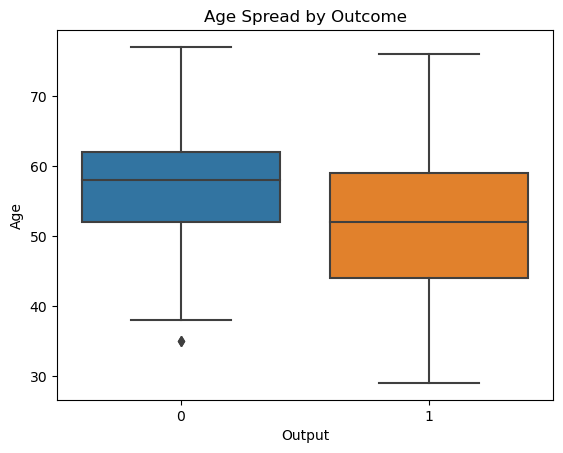

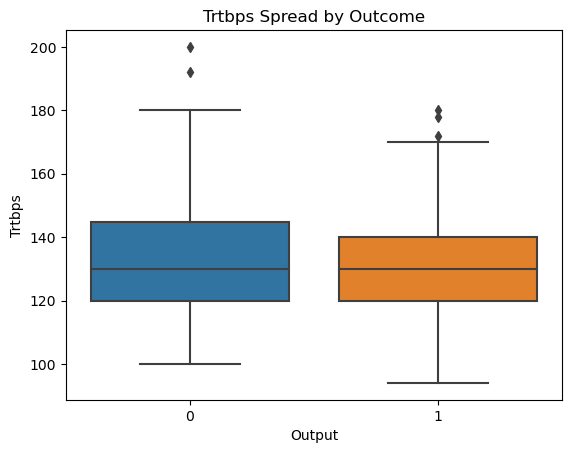

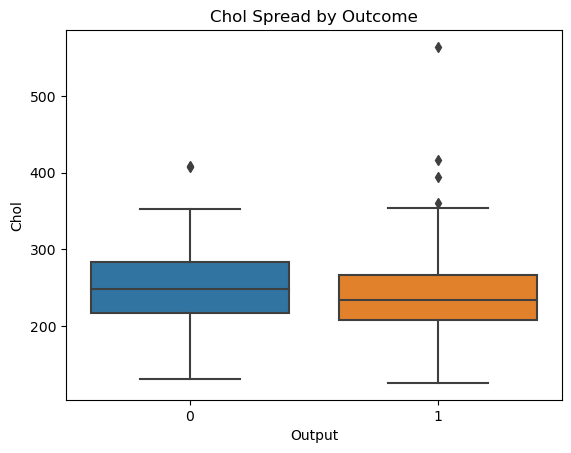

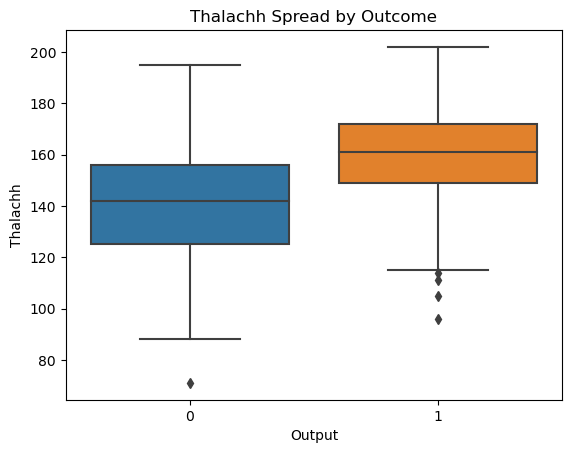

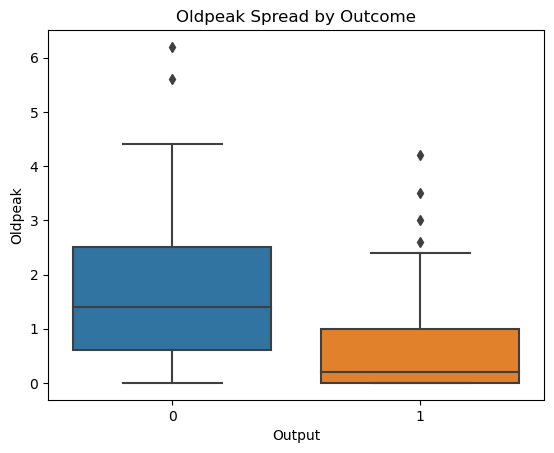

In [18]:
#1 Plotting age
sns.boxplot(x='output', y='age', data=df)
plt.title(f'Age Spread by Outcome')
plt.xlabel('Output')
plt.ylabel('Age')
plt.show()

#2 Plotting trtbps
sns.boxplot(x='output', y='trtbps', data=df)
plt.title(f'Trtbps Spread by Outcome')
plt.xlabel('Output')
plt.ylabel('Trtbps')
plt.show()

#3 Plotting chol
sns.boxplot(x='output', y='chol', data=df)
plt.title(f'Chol Spread by Outcome')
plt.xlabel('Output')
plt.ylabel('Chol')
plt.show()

#4 Plotting thalachh
sns.boxplot(x='output', y='thalachh', data=df)
plt.title(f'Thalachh Spread by Outcome')
plt.xlabel('Output')
plt.ylabel('Thalachh')
plt.show()

#5 Plotting oldpeak
sns.boxplot(x='output', y='oldpeak', data=df)
plt.title(f'Oldpeak Spread by Outcome')
plt.xlabel('Output')
plt.ylabel('Oldpeak')
plt.show()

In [19]:
print("What can you conclude from the plots you created? Are there any interesting findings?\n")
print("Answer - \n Age: Individuals with a higher chance of a heart attack ( output(1) ) are more spread out and have greater variability compared to people with a low chance ( output(0) ). We also notice in this dataset the average age for output(1) is lower than output(0) meaning people with a higher chance of an attack tend to be younger compared to those with a lower chance.")
print("\n trtbps: Doesn't seem to be a significant difference in resting blood pressure between individuals with a high chance (1) and a low chance (0) of a heart attack. The average level for both groups appears to be similar.")
print("\n chol: Likewise to resting blood pressure, there isn't a clear distinction in the chol levels between the two groups. The average level for both groups appears to be similar.")
print("\n thalachh: People with a high chance of heart attack have a higher maximum heart rate (thalachh) compared to those with a low chance. The average level for output(1) shows to be higher than output(0).")
print("\n oldpeak: People with a high chance of heart attack have a lower average oldpeak compared to those with a low chance. We also notice people with a low chance tend to have higher varibility in oldpeak scores.")

What can you conclude from the plots you created? Are there any interesting findings?

Answer - 
 Age: Individuals with a higher chance of a heart attack ( output(1) ) are more spread out and have greater variability compared to people with a low chance ( output(0) ). We also notice in this dataset the average age for output(1) is lower than output(0) meaning people with a higher chance of an attack tend to be younger compared to those with a lower chance.

 trtbps: Doesn't seem to be a significant difference in resting blood pressure between individuals with a high chance (1) and a low chance (0) of a heart attack. The average level for both groups appears to be similar.

 chol: Likewise to resting blood pressure, there isn't a clear distinction in the chol levels between the two groups. The average level for both groups appears to be similar.

 thalachh: People with a high chance of heart attack have a higher maximum heart rate (thalachh) compared to those with a low chance. The aver

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


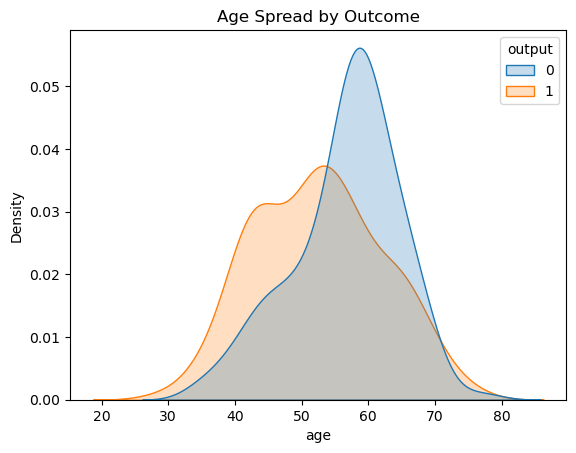

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


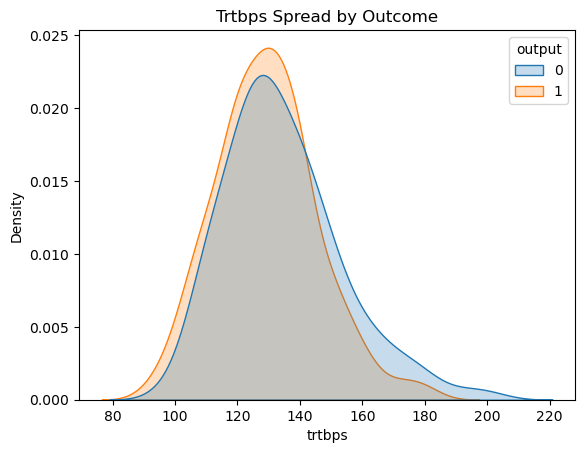

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


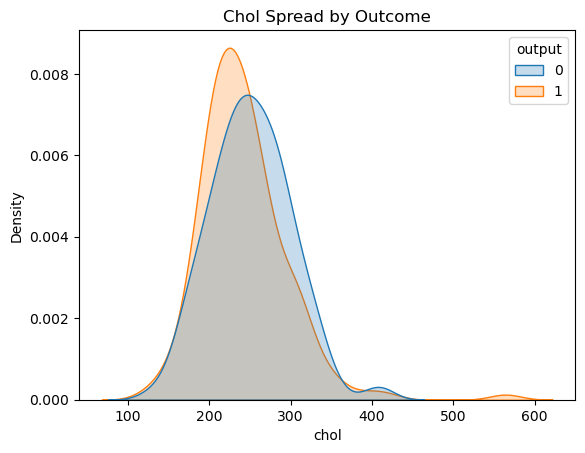

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


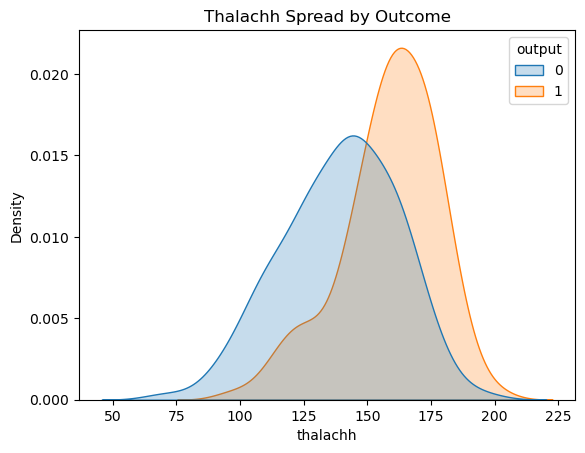

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


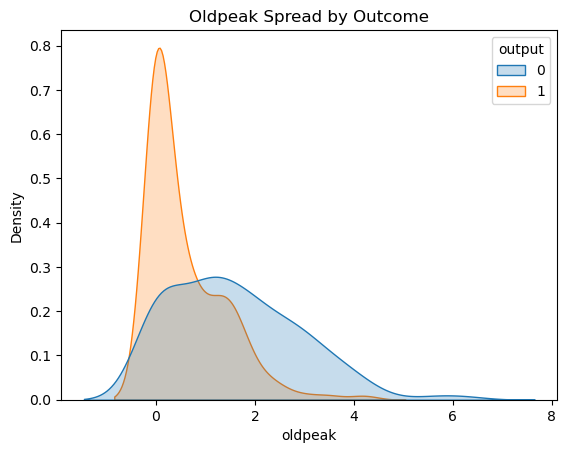

In [20]:
#1 Plotting age
sns.kdeplot(x='age', data=df, hue='output', fill=True, common_norm=False)
plt.title(f'Age Spread by Outcome')
plt.xlabel('age')
plt.ylabel('Density')
plt.show()

#2 Plotting trtbps
sns.kdeplot(x='trtbps', data=df, hue='output', fill=True, common_norm=False)
plt.title(f'Trtbps Spread by Outcome')
plt.xlabel('trtbps')
plt.ylabel('Density')
plt.show()

#3 Plotting chol
sns.kdeplot(x='chol', data=df, hue='output', fill=True, common_norm=False)
plt.title(f'Chol Spread by Outcome')
plt.xlabel('chol')
plt.ylabel('Density')
plt.show()

#4 Plotting thalachh
sns.kdeplot(x='thalachh', data=df, hue='output', fill=True, common_norm=False)
plt.title(f'Thalachh Spread by Outcome')
plt.xlabel('thalachh')
plt.ylabel('Density')
plt.show()

#5 Plotting oldpeak
sns.kdeplot(x='oldpeak', data=df, hue='output', fill=True, common_norm=False)
plt.title(f'Oldpeak Spread by Outcome')
plt.xlabel('oldpeak')
plt.ylabel('Density')
plt.show()

In [21]:
print("What can you conclude from the plots you created? Are there any interesting findings?\n")
print("Answer - \n Age: The distribution of ages looks to be relatively similar, however we notice people that are older have output(0) in comparison to younger people which are more apt to be output(1).")
print("\n trtbps: This distribution is highly similar with majoirty of the plot being overlaped. There is no significant difference between the two data points.")
print("\n chol: Similarly to trtbps this distribution values are similar between people with low and people with high chance of heart attack. We can notice people with output[1] have a higher density (likelihood) at roughly 225 chol.")
print("\n thalachh: The distribution of thalachh shows a slight shift towards lower values for individuals with output(0). We also notice some speration in the distributions with a higher density with output(1) with a higher thalachh.")
print("\n oldpeak: The distribution of oldpeak values is notably different in density levels specifically with output(1) having lower values for oldpeak as opposed to people with output(0) having a higher value of oldpeak.")

print("\n These outputs are very interesting to me specifically with 'oldpeak' and 'thalachh'. We notice significant difference between the two target values illistrating a correlation between the 'oldpeak' value and either being output(0) or output(1) and similarly with 'thalachh'.")

What can you conclude from the plots you created? Are there any interesting findings?

Answer - 
 Age: The distribution of ages looks to be relatively similar, however we notice people that are older have output(0) in comparison to younger people which are more apt to be output(1).

 trtbps: This distribution is highly similar with majoirty of the plot being overlaped. There is no significant difference between the two data points.

 chol: Similarly to trtbps this distribution values are similar between people with low and people with high chance of heart attack. We can notice people with output[1] have a higher density (likelihood) at roughly 225 chol.

 thalachh: The distribution of thalachh shows a slight shift towards lower values for individuals with output(0). We also notice some speration in the distributions with a higher density with output(1) with a higher thalachh.

 oldpeak: The distribution of oldpeak values is notably different in density levels specifically with output(1

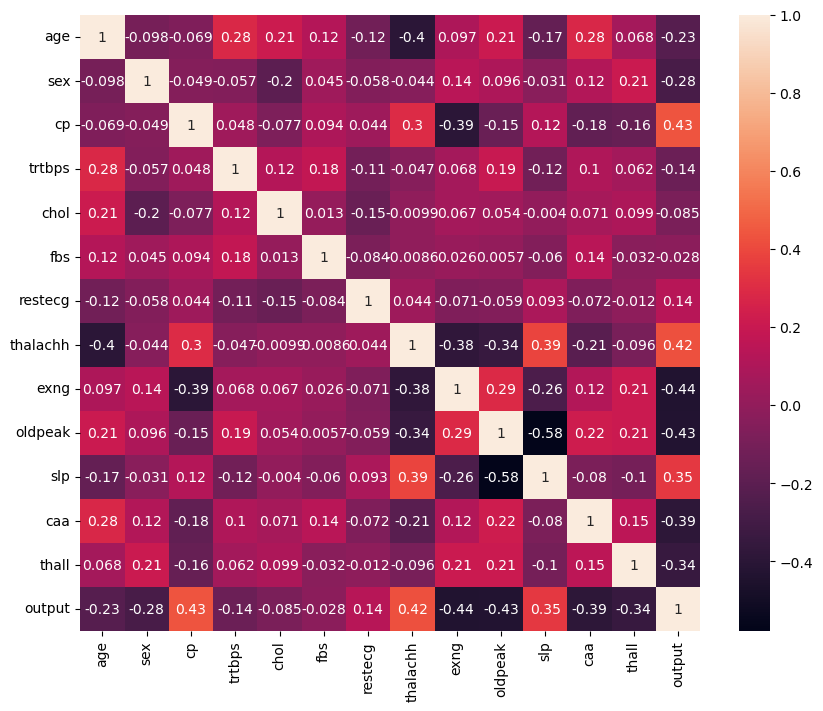

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [23]:
print("What can you conclude from the heatmap you created? Are there any interesting findings?\n")
print("Answer - In the heatmap we notice a positive correlation between multiple datasets as well as negative. Some data with a strong positive correlation include - Output and Chest Pain (cp), Maximum heart rate achieved (thalachh) with output, slope with output, as well as slope and Maximum heart rate achieved (thalachh). Some strong negative correlations include Age with Maximum heart rate achieved (thalachh), output with exercise induced angina (exng), output with oldpeak, slope with oldpeak as well as many others.")

What can you conclude from the heatmap you created? Are there any interesting findings?

Answer - In the heatmap we notice a positive correlation between multiple datasets as well as negative. Some data with a strong positive correlation include - Output and Chest Pain (cp), Maximum heart rate achieved (thalachh) with output, slope with output, as well as slope and Maximum heart rate achieved (thalachh). Some strong negative correlations include Age with Maximum heart rate achieved (thalachh), output with exercise induced angina (exng), output with oldpeak, slope with oldpeak as well as many others.


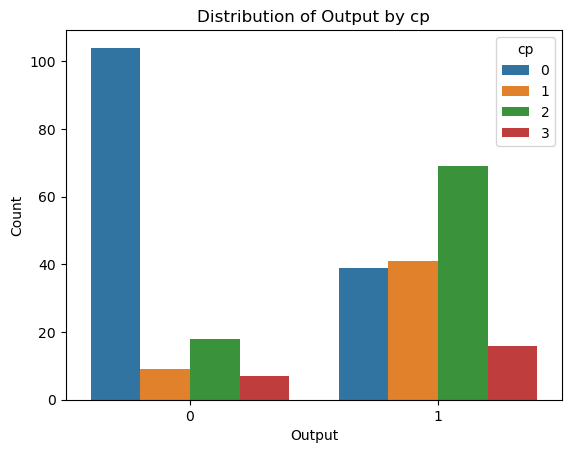

In [24]:
sns.countplot(x='output', hue='cp', data=df)
plt.title('Distribution of Output by cp')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

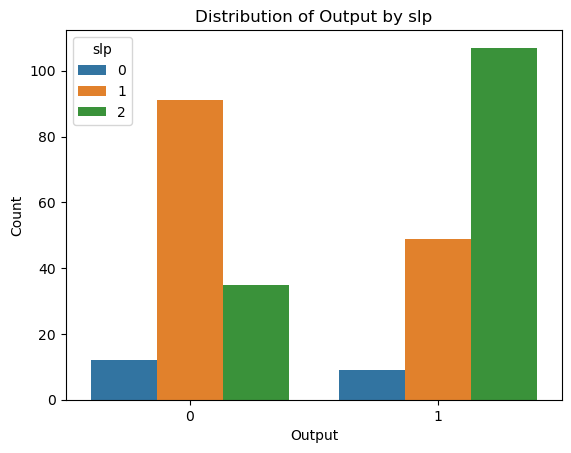

In [25]:
sns.countplot(x='output', hue='slp', data=df)
plt.title('Distribution of Output by slp')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

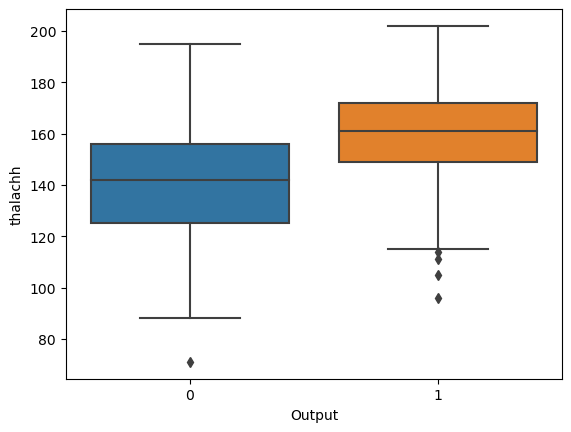

In [26]:
sns.boxplot(x='output', y='thalachh', data=df)
plt.xlabel('Output')
plt.ylabel('thalachh')
plt.show()

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


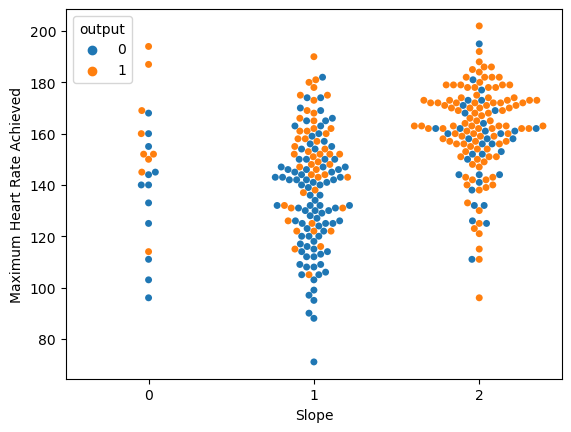

In [27]:
sns.swarmplot(x='slp', y='thalachh', hue='output', data=df)
plt.xlabel('Slope')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

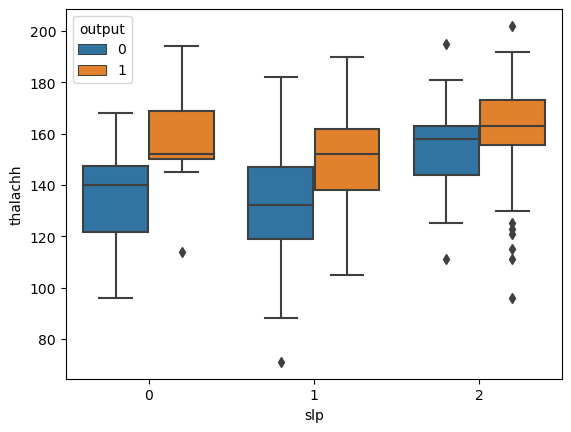

In [28]:
sns.boxplot(x='slp', y='thalachh', hue = 'output', data=df)
plt.xlabel('slp')
plt.ylabel('thalachh')
plt.show()

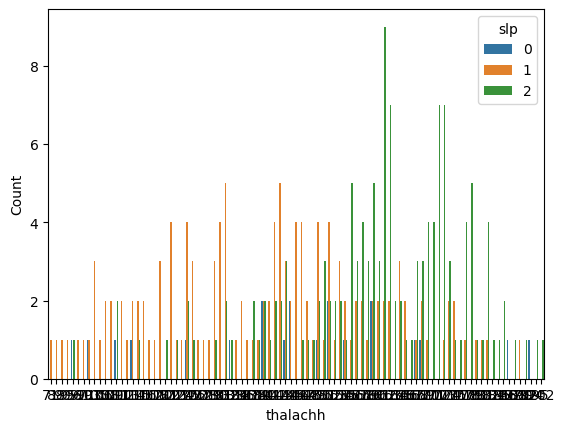

In [29]:
sns.countplot(x='thalachh', hue='slp', data=df)
plt.xlabel('thalachh')
plt.ylabel('Count')
plt.show()

C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Justin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

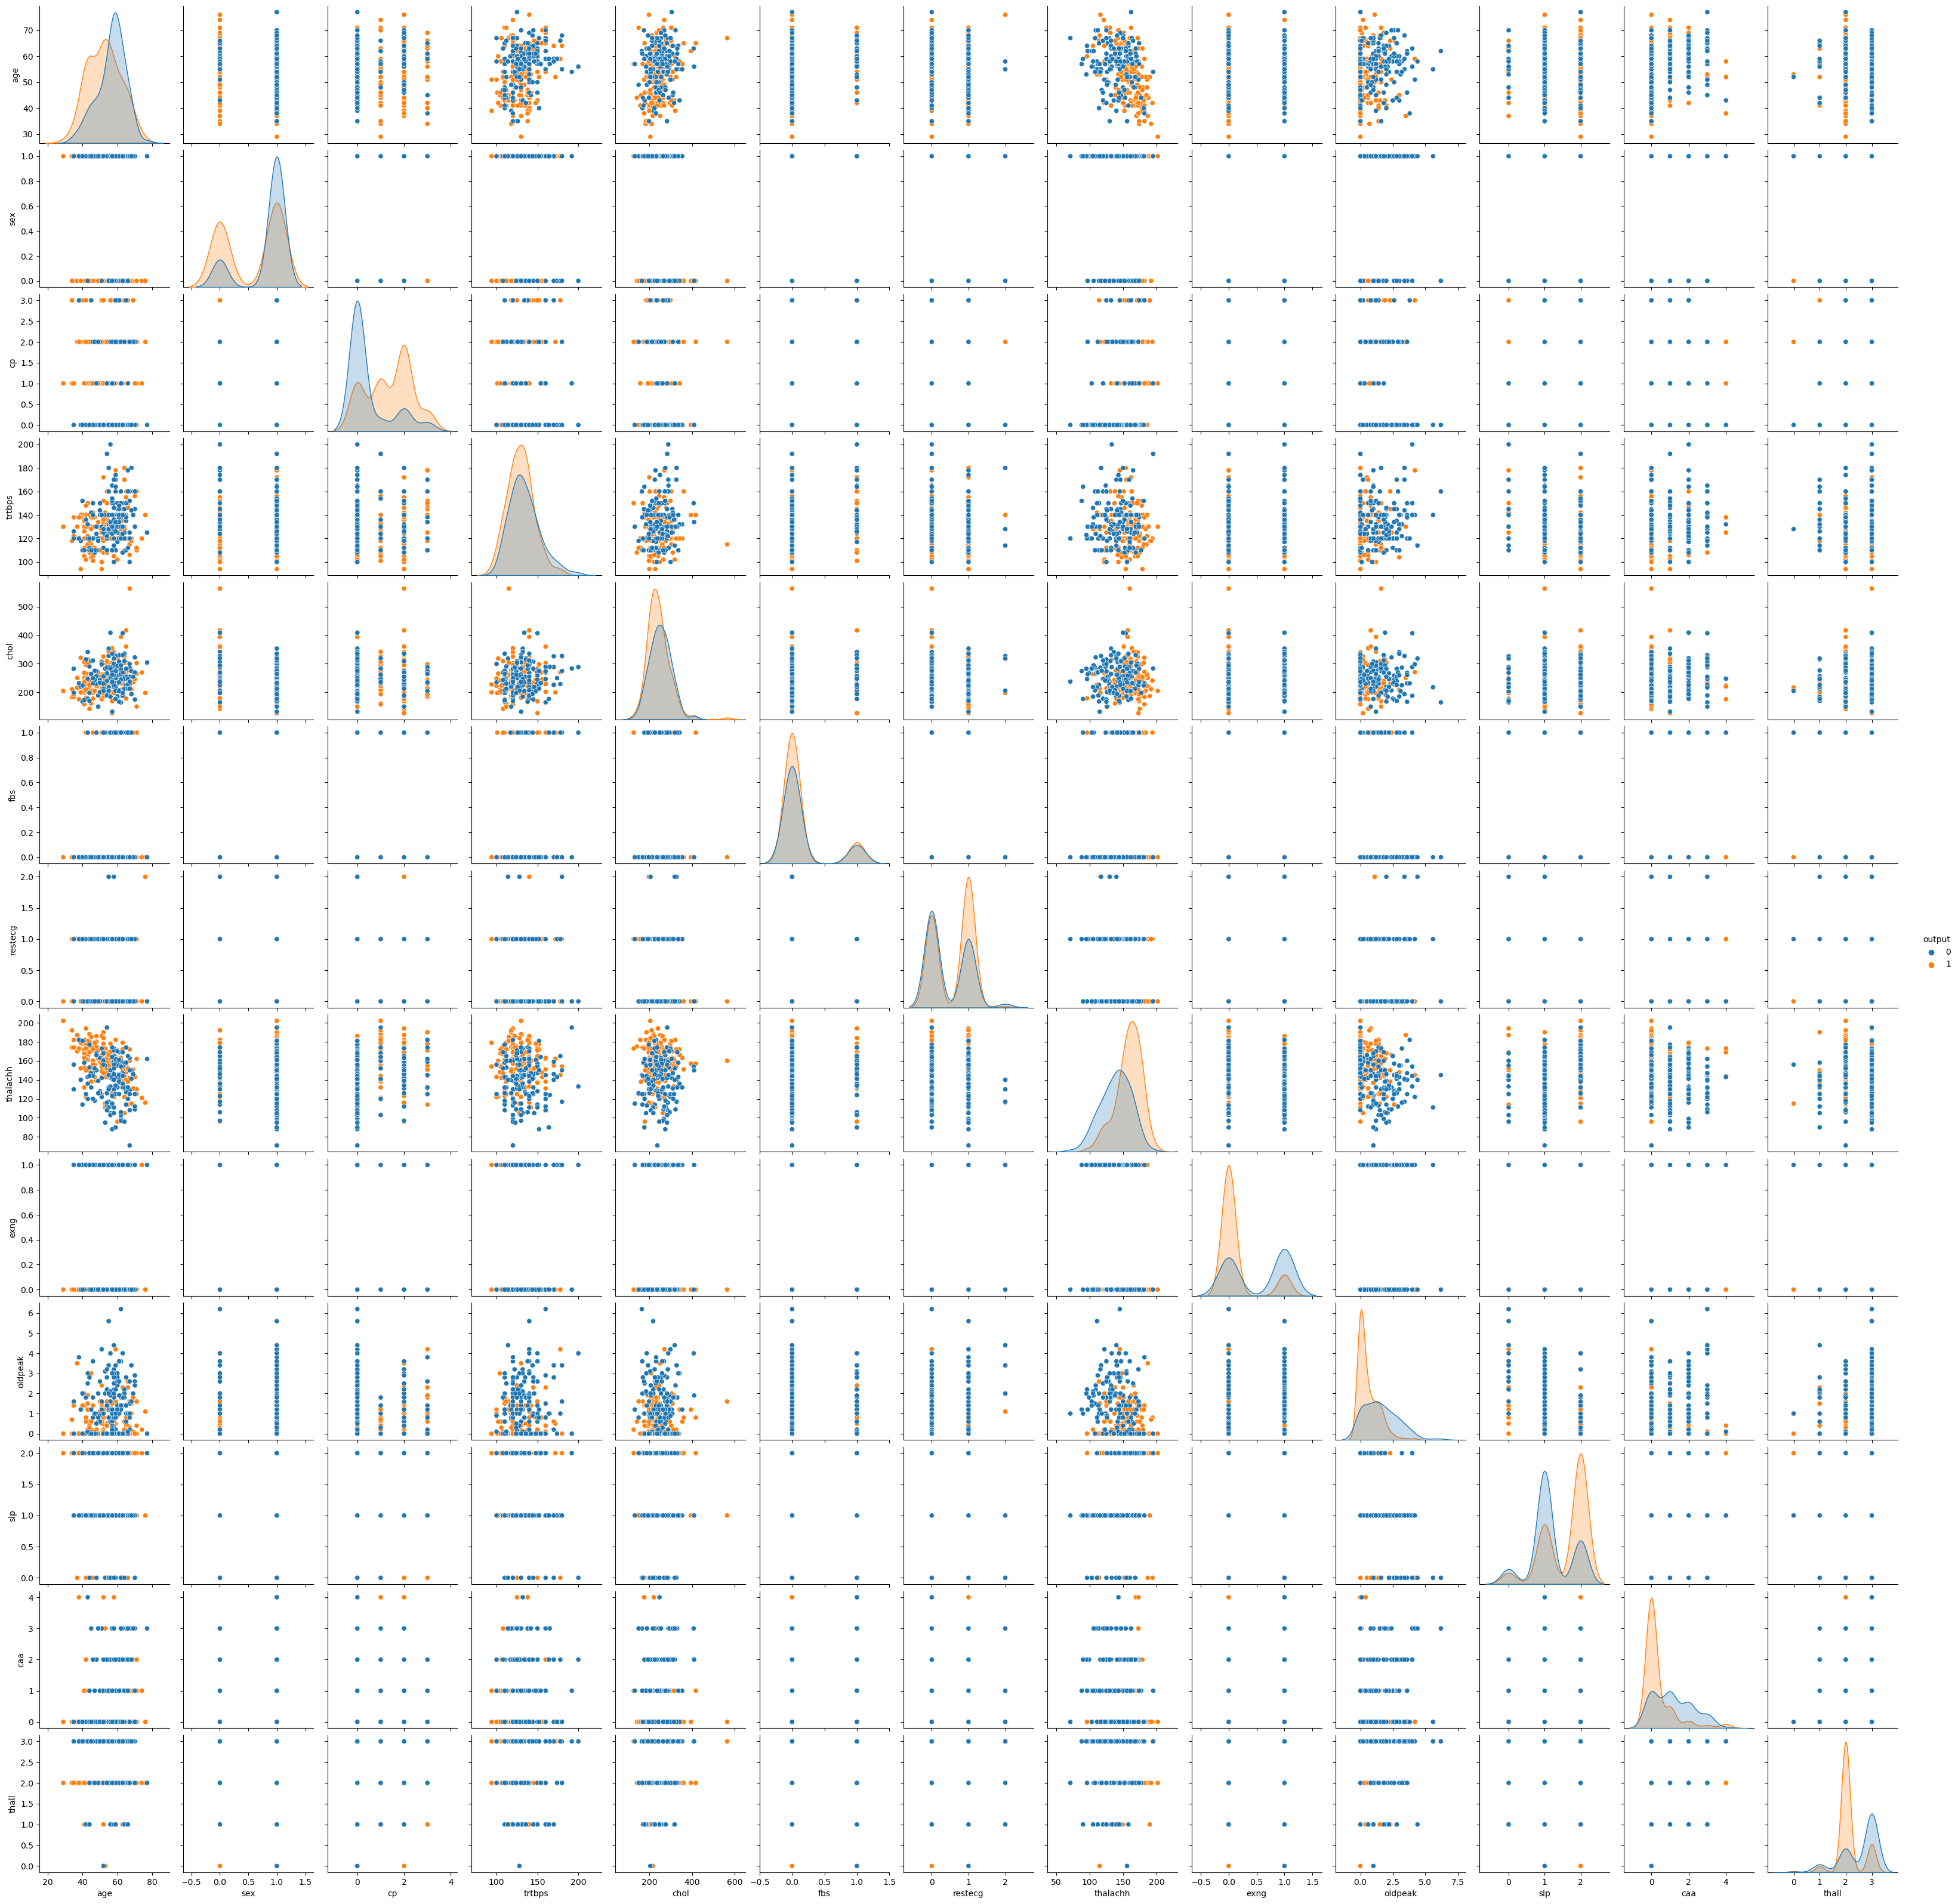

In [30]:
sns.pairplot(df, hue='output', diag_kind='kde')
plt.show()

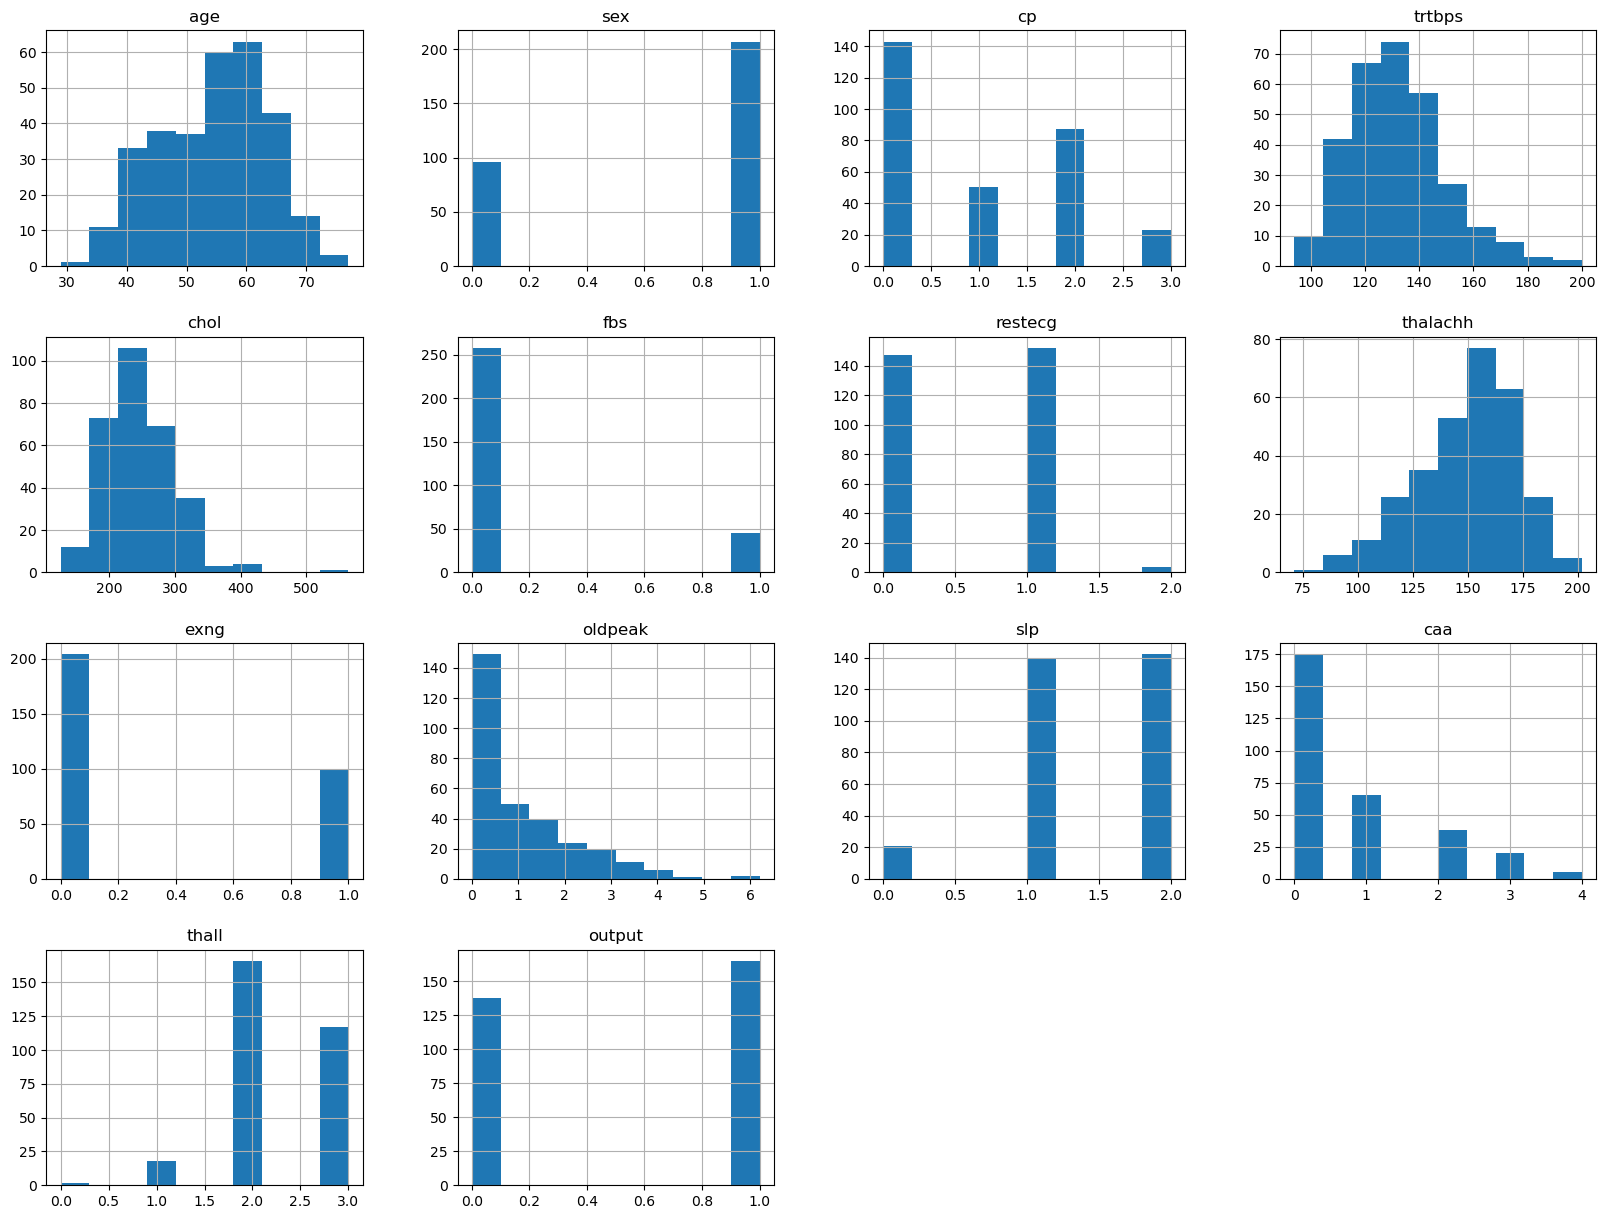

In [31]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.show()

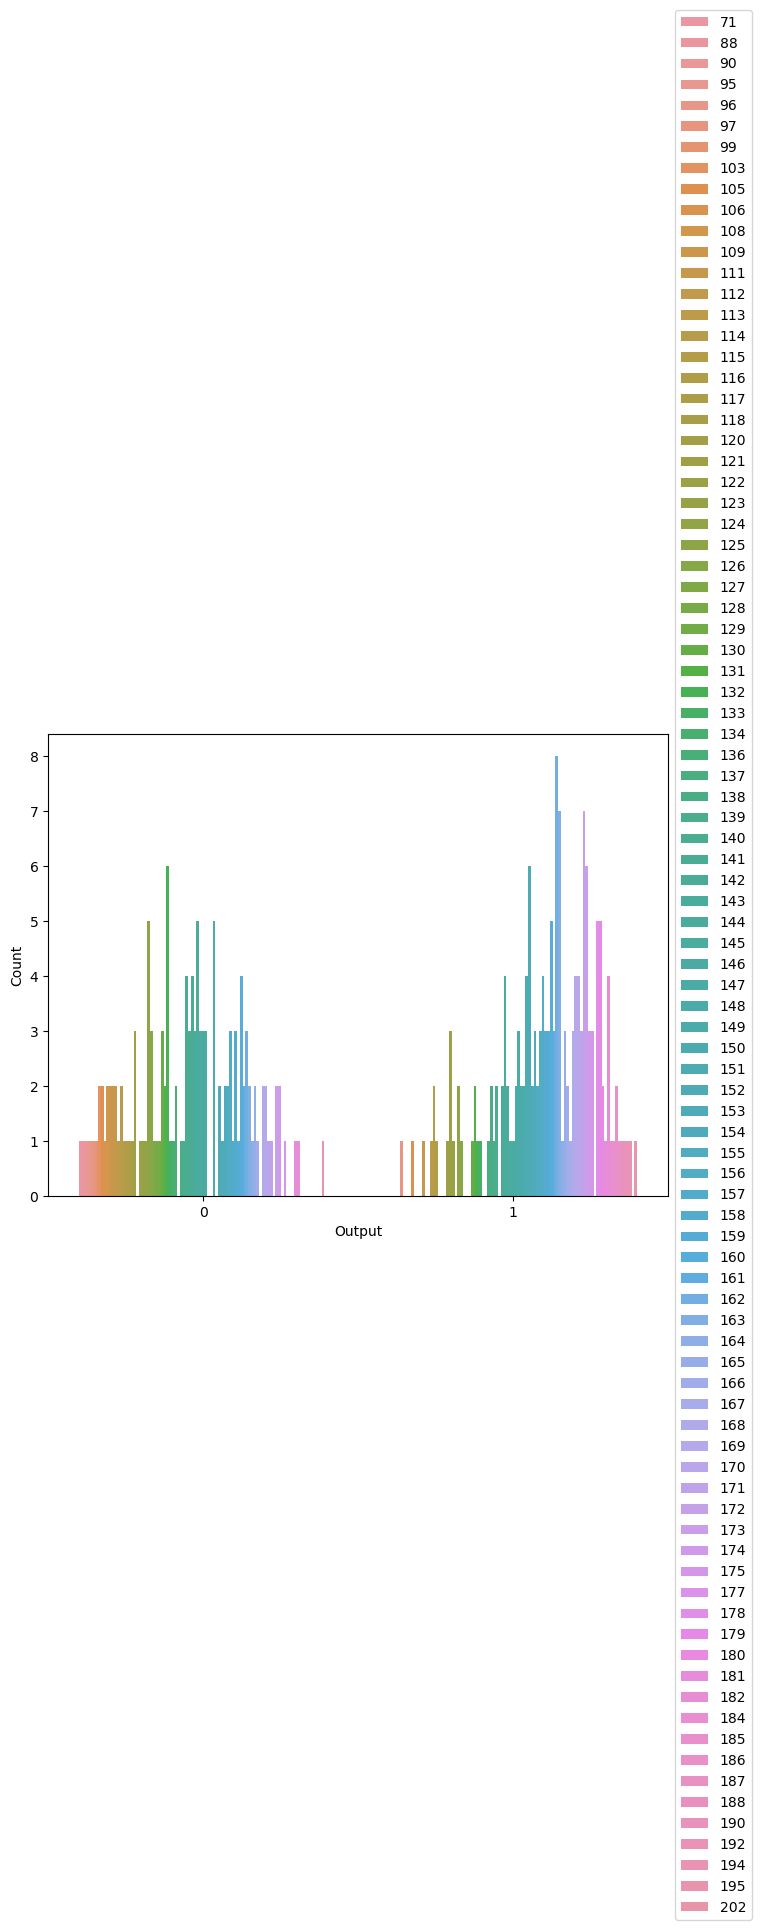

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='output', hue='thalachh', data=df)
plt.xlabel('Output')
plt.ylabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

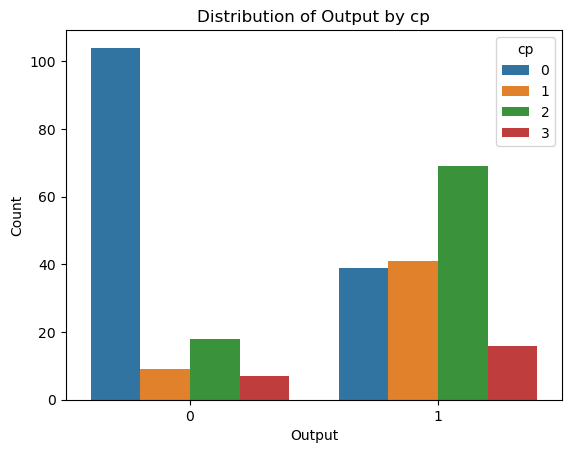

In [33]:
sns.countplot(x='output', hue='cp', data=df)
plt.title('Distribution of Output by cp')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

In [34]:
print("What can you conclude from the plots that you created? Did you find anything interesting? \n")
print("From the plots I had created one I found interesting was the countplot of the output and chest pain. We notice a significant amount of people in output(0) have cp(0) in comparison to output(1) which majoirty have cp(2) or even cp(1). This indicates people with output(1) = High chance of heart attack have an increase in chest pain.")

What can you conclude from the plots that you created? Did you find anything interesting? 

From the plots I had created one I found interesting was the countplot of the output and chest pain. We notice a significant amount of people in output(0) have cp(0) in comparison to output(1) which majoirty have cp(2) or even cp(1). This indicates people with output(1) = High chance of heart attack have an increase in chest pain.


In [35]:
print("Name two different models that you can use to solve the problem statement. \n")
print("Answer - Logistic Regression and K-Nearest Neighbors (KNN) Classifier. \n")

print("What is the difference between label encoding and one hot encoding, and when should you use one over the other? \n")
print("Answer - Label Encoding is used for converting categorical labels into numeric form. Label Encoding is most suitable for ordinal categorical variables (natural order or ranking). One Hot Encoding - Converts categorical variables to binary, most suitable for nomial variables (no inherent order or ranking). \n")

print("What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data? \n")
print("Answer - Multicollinerity is whenever two or more predictor variables within a regression model have high correlarity with one another. We care about this because high multicollinearity can lead to unstable and unreliable predictions. We can check if there are significant multicollinearity in our data by calculateing the correlation matrix ")

print("Why is scaling data important? \n")
print("Answer - Scaling ensures that all features contribute equally to the model as well as preventing features from dominating others. \n")

print("For the two different models that you named earlier, are they using a parametric or nonparametric learning algorithms? What’s the difference? \n")
print("Answer - Logistic Regression = Parametric, which make assumptions about the relationship between input features and target variable.\n")
print("KNN = Nonparametric, which do not make assumptions and grow with the size of the training data.\n")

print("Suppose that we had missing values in our dataset. What are different ways we could handle them? \n")
print("Answer - One method to handle missing values would be to replace them with the mean, median, or mode of the feature. This is an effective approach however doesn't always work if missing too many values. Another way to handle missing values would be removing rows containing an excessive amount of values. ")

Name two different models that you can use to solve the problem statement. 

Answer - Logistic Regression and K-Nearest Neighbors (KNN) Classifier. 

What is the difference between label encoding and one hot encoding, and when should you use one over the other? 

Answer - Label Encoding is used for converting categorical labels into numeric form. Label Encoding is most suitable for ordinal categorical variables (natural order or ranking). One Hot Encoding - Converts categorical variables to binary, most suitable for nomial variables (no inherent order or ranking). 

What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data? 

Answer - Multicollinerity is whenever two or more predictor variables within a regression model have high correlarity with one another. We care about this because high multicollinearity can lead to unstable and unreliable predictions. We can check if there are significa


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



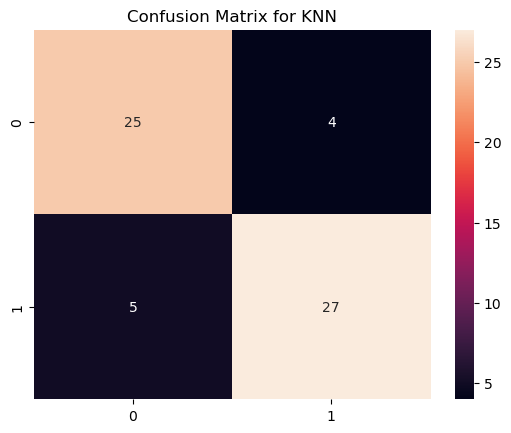

Accuracy: 0.8524590163934426

Cross-Validation Scores: [0.7755102  0.89795918 0.77083333 0.85416667 0.79166667]


In [45]:
# Model 1: Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Spliting data into Feature and Target
X = df.drop(columns = ['output'])
y = df['output']

# Split dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fit Model
log_reg = LogisticRegression()
model = log_reg.fit(X_train_scaled, y_train)

# Predictions
predictions = model.predict(X_test_scaled)

# Classification report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, predictions))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("\nCross-Validation Scores:", log_reg_scores)


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



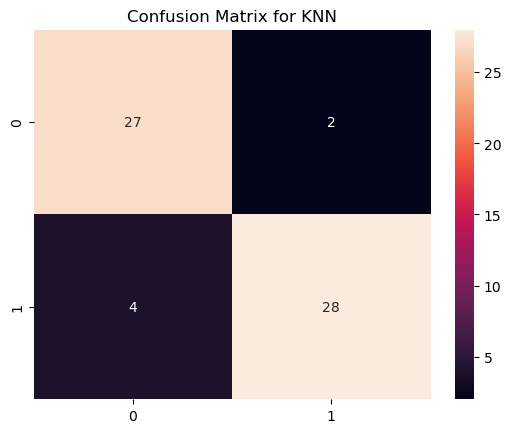

Accuracy: 0.9016393442622951
K-Nearest Neighbors (KNN) Cross-Validation Scores: [0.7755102  0.83673469 0.83333333 0.77083333 0.85416667]


In [46]:
# Model 2: K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Separate features and target variable
X = df.drop(columns=['output'])
y = df['output']

# Split dataset into 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predictions
knn_predictions = knn_model.predict(X_test_scaled)

# Classification report and confusion matrix
print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_predictions))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)


knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("K-Nearest Neighbors (KNN) Cross-Validation Scores:", knn_scores)

In [47]:
print("Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason\n")

print("Some main points I had discovered while exploring the data include -  An imbalance in the target variable, with a slightly higher prevalence of instances in output(1) compared to output(0). I used the standard scaler method, this helps to ensure model fairness in comparisons. I also used a scaller to standardize the features and prevent any particular feature from dominating the model. I implemented logistic regression as well as K-nearest neighbors (KNN) models to my dataset. I choose logistic regression due to its suitability for binary classification tasks as opposed to Linear Regression whcih is not suitable for binary classification. I used KNN as its a simple and effective algorithm which provides a more complex, non-linear approach. Each model had good accuracy in predicting heart attacks with KNN acheving a higher accuracy rating.")

Write a conclusion (~1 paragraph) detailing the main points you discovered while exploring the data. Also include things like: Did you scale your data? If so, which scaling method did you use and why? Is there a specific reason

Some main points I had discovered while exploring the data include -  An imbalance in the target variable, with a slightly higher prevalence of instances in output(1) compared to output(0). I used the standard scaler method, this helps to ensure model fairness in comparisons. I also used a scaller to standardize the features and prevent any particular feature from dominating the model. I implemented logistic regression as well as K-nearest neighbors (KNN) models to my dataset. I choose logistic regression due to its suitability for binary classification tasks as opposed to Linear Regression whcih is not suitable for binary classification. I used KNN as its a simple and effective algorithm which provides a more complex, non-linear approach. Each model had good a